In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [7]:
data_dir='/home/wizard/Documents/observing_the_ocean/satellites/Satellite_exercises/'

In [8]:
###Load and plot XBT data

In [11]:
import scipy.io as spio
import scipy

def loadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    def _check_keys(d):
        '''
        checks if entries in dictionary are mat-objects. If yes
        todict is called to change them to nested dictionaries
        '''
        for key in d:
            if isinstance(d[key], spio.matlab.mio5_params.mat_struct):
                d[key] = _todict(d[key])
        return d

    def _todict(matobj):
        '''
        A recursive function which constructs from matobjects nested dictionaries
        '''
        d = {}
        for strg in matobj._fieldnames:
            elem = matobj.__dict__[strg]
            if isinstance(elem, spio.matlab.mio5_params.mat_struct):
                d[strg] = _todict(elem)
            elif isinstance(elem, np.ndarray):
                d[strg] = _tolist(elem)
            else:
                d[strg] = elem
        return d

    def _tolist(ndarray):
        '''
        A recursive function which constructs lists from cellarrays
        (which are loaded as numpy ndarrays), recursing into the elements
        if they contain matobjects.
        '''
        elem_list = []
        for sub_elem in ndarray:
            if isinstance(sub_elem, spio.matlab.mio5_params.mat_struct):
                elem_list.append(_todict(sub_elem))
            elif isinstance(sub_elem, np.ndarray):
                elem_list.append(_tolist(sub_elem))
            else:
                elem_list.append(sub_elem)
        return elem_list
    data = scipy.io.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

In [12]:
# import scipy.io as spio
dat=loadmat(data_dir+'AX22_Jan2018.mat')

In [34]:
dat['S']['a221801'].keys()

dict_keys(['depth', 'lat', 'lon1', 'day', 'mon', 'year', 'hour', 'min', 'sec', 'profile_number', 'T', 'time', 'lon2'])

In [69]:
depth=np.asarray(dat["S"]['a221801']['depth'])
temp=np.asarray(dat["S"]['a221801']['T'])
lat=np.asarray(dat['S']['a221801']['lat'])
lon1=dat['S']['a221801']['lon1']
lon2=np.asarray(dat['S']['a221801']['lon2'])

Text(0,0.5,'Temperature')

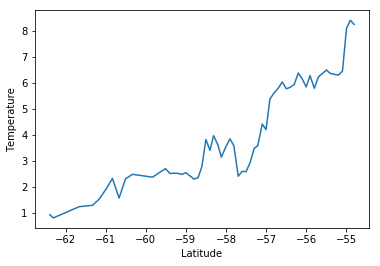

In [47]:
#plot sst vs latitude XBT 22
plt.plot(lat,temp[0,:])
plt.xlabel('Latitude')
plt.ylabel('Temperature')

In [48]:
###Load and plot OSTIA data
import xarray as xr
ds=xr.open_dataset(data_dir+'nc_20180101-UKMO-L4HRfnd-GLOB-v01-fv02-OSTIA.nc.bz2.nc')

In [56]:
ds_section=ds.sel(lat=slice(-63,-55),lon=slice(-64,-60))

In [73]:
ds_section.keys()

KeysView(<xarray.Dataset>
Dimensions:           (lat: 160, lon: 80, time: 1)
Coordinates:
  * time              (time) datetime64[ns] 2018-01-01T12:00:00
  * lat               (lat) float32 -62.975 -62.925 -62.875 -62.825 -62.775 ...
  * lon               (lon) float32 -63.975 -63.925 -63.875 -63.825 -63.775 ...
Data variables:
    analysed_sst      (time, lat, lon) float32 273.91 273.9 273.9 273.88998 ...
    analysis_error    (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
Attributes:
    NC_GLOBAL.Conventions:            CF-1.0
    NC_GLOBAL.title:                  Global SST & Sea Ice Analysis, L4 OSTIA...
    NC_GLOBAL.DSD_entry_id:           UKMO-L4HRfnd-GLOB-OSTIA
    NC_GLOBAL.references:             None
    NC_GLOBAL.institution:            UK Met Office
    NC_GLOBAL.contact:                servicedesk.cmems@mercator-ocean.eu
    NC_GLOBAL.GDS_version_id:         v1.0-rev1.7
    NC_GLOBAL.netc

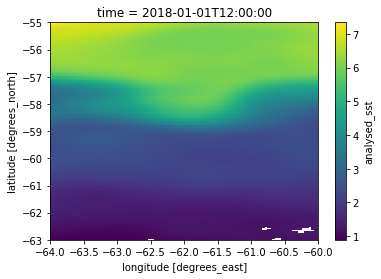

In [74]:
(ds_section.analysed_sst-273).plot()

In [124]:
###Co-locate

In [128]:
sst_new=ds_section.reindex(lat=lat,lon=lon2,method='nearest')

In [129]:
ostia_sst=(sst_new.analysed_sst-273).squeeze()

Text(0,0.5,'Temperature')

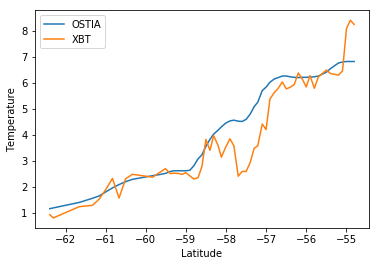

In [132]:
ostia_sst.shape
plt.plot(sst_new.lat,ostia_sst[:,40],label='OSTIA')
plt.plot(lat,temp[0,:],label='XBT')
plt.legend()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
